In [1]:
import pandas as pd
in_patient_train = pd.read_csv('Train_Inpatientdata-1542865627584.csv')

FileNotFoundError: [Errno 2] File b'Train_Inpatientdata-1542865627584.csv' does not exist: b'Train_Inpatientdata-1542865627584.csv'

40,474 rows in the in-patient datafile

In [ ]:
in_patient_train.shape

30 columns, across provider, amount reimbursed, physicians, admission date, all the codes.

In [ ]:
in_patient_train.head()

description of continuous variables.  10,300usd average reimbursed claim.  The deductible is 1,068usd and that is always the same, across nearly 40,000 records.  That's odd.

In [8]:
in_patient_train.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


There are 112 claims without an attending physician, which seems odd for in-patient admissions.  Not sure what that means.  Other NAs make sense to me, since there won't necessarily be 2nd and so forth diagnosis codes and it seems possible there wouldn't be any procedure codes since physician might not be able to do anything (and thus submit a claim.)  Notice there are 899 NAs in deductible paid.

In [6]:
import numpy as np
a = np.sum(in_patient_train.isnull())
a[a>0]

AttendingPhysician       112
OperatingPhysician     16644
OtherPhysician         35784
DeductibleAmtPaid        899
ClmDiagnosisCode_2       226
ClmDiagnosisCode_3       676
ClmDiagnosisCode_4      1534
ClmDiagnosisCode_5      2894
ClmDiagnosisCode_6      4838
ClmDiagnosisCode_7      7258
ClmDiagnosisCode_8      9942
ClmDiagnosisCode_9     13497
ClmDiagnosisCode_10    36547
ClmProcedureCode_1     17326
ClmProcedureCode_2     35020
ClmProcedureCode_3     39509
ClmProcedureCode_4     40358
ClmProcedureCode_5     40465
ClmProcedureCode_6     40474
dtype: int64

Looking at unique counts.  It does appear the claimID is the unique identifier since that has 40474 unique values, the number of rows in the dataframe.  I note that there are 398 unique values of claim start date, with more than a few dates with only one or two claims starting on those dates, vs 145 on other days. On the other hand, for claim end date, the smallest count is 75 on Christmas 2009.  That also seems odd to me.  There seem to be physicians with 300 or more claims, and then a number that show up only on 1 claim.

In [7]:
for colmn in in_patient_train.columns:
    print(in_patient_train[colmn].value_counts())

BENE134170    8
BENE62091     7
BENE121796    7
BENE117116    7
BENE119457    7
             ..
BENE54303     1
BENE102317    1
BENE45683     1
BENE12577     1
BENE131429    1
Name: BeneID, Length: 31289, dtype: int64
CLM57567    1
CLM64843    1
CLM68037    1
CLM38727    1
CLM35518    1
           ..
CLM54486    1
CLM47473    1
CLM78030    1
CLM73403    1
CLM55466    1
Name: ClaimID, Length: 40474, dtype: int64
2009-02-10    145
2009-02-26    144
2009-01-31    143
2009-01-06    139
2009-02-02    138
             ... 
2008-12-07      2
2008-12-10      1
2008-12-03      1
2009-12-31      1
2008-12-06      1
Name: ClaimStartDt, Length: 398, dtype: int64
2009-02-11    153
2009-01-10    146
2009-03-03    144
2009-04-11    141
2009-02-24    138
             ... 
2009-11-03     82
2009-11-29     82
2009-10-19     79
2009-11-11     77
2009-12-25     75
Name: ClaimEndDt, Length: 365, dtype: int64
PRV52019    516
PRV55462    386
PRV54367    322
PRV53706    282
PRV55209    275
           ... 
PRV

Let's look at the distribution of claims by patient.

In [35]:
b = in_patient_train.groupby('BeneID').agg(['count'])
b.columns = [x[0] for x in b.columns]
b

,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
BeneID,,,,,,,,,,,,,,,,,,,,,
BENE100002,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,1,1,0,0,0,0
BENE100004,1,1,1,1,1,1,0,1,1,1,...,1,1,1,0,0,0,0,0,0,0
BENE100006,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,1,1,0,0,0,0
BENE100007,1,1,1,1,1,1,0,0,1,1,...,1,1,1,0,0,0,0,0,0,0
BENE100010,2,2,2,2,2,2,2,0,2,2,...,2,2,2,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BENE99965,1,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
BENE99974,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,1,1,0,0,0,0
BENE99976,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


most patients have only 1 or 2 claims, with a rightward skew

Text(0, 0.5, 'count of patients with # of claims')

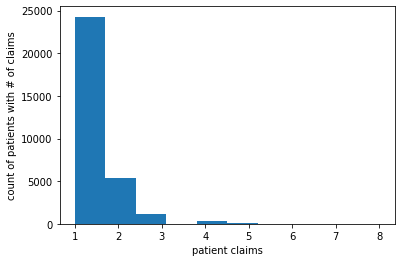

In [24]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.hist(b['ClaimID'])
plt.xlabel('patient claims')
plt.ylabel('count of patients with # of claims')


In [20]:
c = in_patient_train.groupby('AttendingPhysician').agg(['count'])
c.columns = [x[0] for x in c.columns]
c

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
AttendingPhysician,,,,,,,,,,,,,,,,,,,,,
PHY311002,1,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
PHY311023,1,1,1,1,1,1,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
PHY311028,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,1,0,0,0,0,0
PHY311035,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
PHY311056,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PHY434121,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
PHY434136,1,1,1,1,1,1,0,0,1,1,...,1,1,1,0,0,0,0,0,0,0
PHY434139,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,1,0,0,0,0,0


Most physicians only have 0-25 claims, but a few are on out to nearly 400 claims

Text(0, 0.5, 'count of physicians with # of claims')

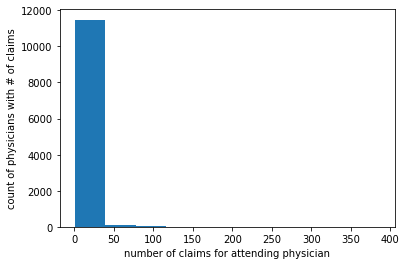

In [27]:
plt.hist(c['ClaimID'])
plt.xlabel('number of claims for attending physician')
plt.ylabel('count of physicians with # of claims')

In [25]:
d = in_patient_train.groupby('OtherPhysician').agg(['count'])
d.columns = [x[0] for x in d.columns]
d

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
OtherPhysician,,,,,,,,,,,,,,,,,,,,,
PHY311007,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,0,0,0,0,0,0
PHY311075,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
PHY311076,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,0,0,0,0
PHY311159,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,0,0,0,0,0,0
PHY311376,2,2,2,2,2,2,2,1,2,2,...,2,2,2,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PHY433923,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
PHY433947,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
PHY433977,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0


same pattern for 'other' physician, with most having 0-25 claims, but a few showing up on 400 claims

Text(0, 0.5, 'count of physicians with # of claims')

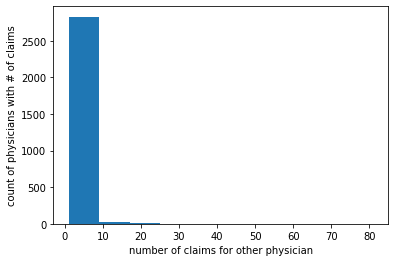

In [32]:
plt.hist(d['ClaimID'])
plt.xlabel('number of claims for other physician')
plt.ylabel('count of physicians with # of claims')

In [29]:
e = in_patient_train.groupby('OperatingPhysician').agg(['count'])
e.columns = [x[0] for x in e.columns]
e

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
OperatingPhysician,,,,,,,,,,,,,,,,,,,,,
PHY311019,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
PHY311058,2,2,2,2,2,2,2,1,2,2,...,2,2,2,2,2,1,0,0,0,0
PHY311096,16,16,16,16,16,16,16,3,16,16,...,11,10,10,0,16,4,1,0,0,0
PHY311128,2,2,2,2,2,2,2,0,2,2,...,1,1,1,0,2,0,0,0,0,0
PHY311141,2,2,2,2,2,2,2,1,2,2,...,2,2,2,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PHY434024,2,2,2,2,2,2,2,0,2,2,...,2,2,1,0,2,0,0,0,0,0
PHY434084,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,0,0,0,0
PHY434143,1,1,1,1,1,1,1,0,1,1,...,1,0,0,0,1,0,0,0,0,0


Text(0, 0.5, 'count of physicians with # of claims')

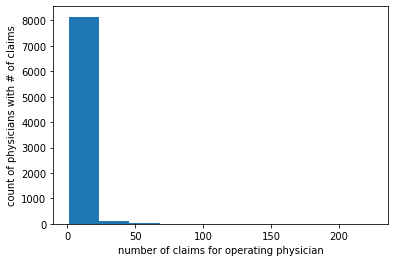

In [31]:
plt.hist(e['ClaimID'])
plt.xlabel('number of claims for operating physician')
plt.ylabel('count of physicians with # of claims')

The amount of reimbursement is  up to 10,000 USD, but there are some out to 100,000USD

Text(0, 0.5, 'count of claims with that reimbursement')

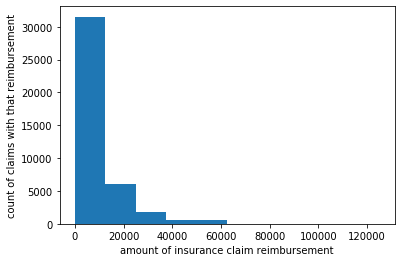

In [34]:
plt.hist(in_patient_train['InscClaimAmtReimbursed'])
plt.xlabel('amount of insurance claim reimbursement')
plt.ylabel('count of claims with that reimbursement')

count of diagnostic codes and procedure codes per claim, then see what average number is.

In [58]:
in_patient_train.loc[in_patient_train['ClaimID']=='CLM46614',['ClmDiagnosisCode_7','ClmDiagnosisCode_9','ClmDiagnosisCode_10']]

,ClmDiagnosisCode_7,ClmDiagnosisCode_9,ClmDiagnosisCode_10
0,2724,5849,NaN


In [66]:
np.sum(in_patient_train.loc[in_patient_train['ClaimID']=='CLM46614',['ClmDiagnosisCode_7','ClmDiagnosisCode_9','ClmDiagnosisCode_10']].count(axis=0))

2

In [60]:
in_patient_train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [78]:
diag_colmn = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4', 
              'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6','ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 
              'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']
proced_colmn = ['ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3', 'ClmProcedureCode_4', 
                'ClmProcedureCode_5','ClmProcedureCode_6']

in_patient_train['Num_diag_codes'] = [np.sum(in_patient_train.loc[in_patient_train['ClaimID']==claim,diag_colmn].\
                            count(axis=0)) for claim in in_patient_train['ClaimID']]


In [79]:
in_patient_train['Num_diag_codes'] 

0         9
1         3
2         6
3         9
4         9
         ..
40469    10
40470     9
40471     9
40472     9
40473     9
Name: Num_diag_codes, Length: 40474, dtype: int64

9 appears to be a popular number of diagnostic codes for a claim

Text(0, 0.5, 'count of claims with # of diag codes')

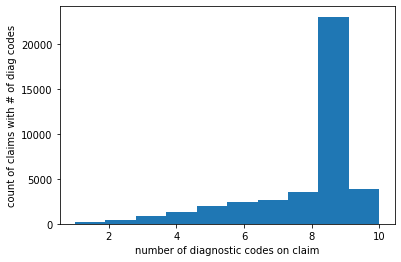

In [81]:
plt.hist(in_patient_train['Num_diag_codes'])
plt.xlabel('number of diagnostic codes on claim')
plt.ylabel('count of claims with # of diag codes')

In [82]:
in_patient_train['Num_proc_codes'] = [np.sum(in_patient_train.loc[in_patient_train['ClaimID']==claim,proced_colmn].\
                            count(axis=0)) for claim in in_patient_train['ClaimID']]

a little under half admissions have no procedures, about the same number have one procedure, and a few claims have up to 4 procedures.

Text(0, 0.5, 'count of claims with # of proc codes')

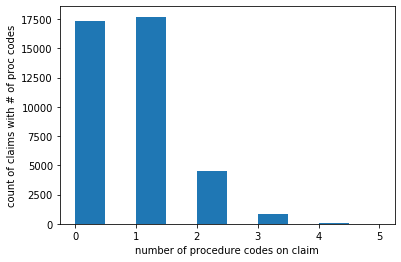

In [83]:
plt.hist(in_patient_train['Num_proc_codes'])
plt.xlabel('number of procedure codes on claim')
plt.ylabel('count of claims with # of proc codes')